In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_csv('/content/Glass Identification.csv',header=None)
df.head()

0        1      2     3     4      5     6     7    8    9   10
0   1  1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.0  0.0   1
1   2  1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.0  0.0   1
2   3  1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.0  0.0   1
3   4  1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.0  0.0   1
4   5  1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.0  0.0   1

In [ ]:
column=['Id','RL','Sodium','Magnesium','Aluminum','Silicon','Potassium','Calcium','Barium','Iron','Type']
df.columns = column
df.head()

Id       RL  Sodium  Magnesium  Aluminum  Silicon  Potassium  Calcium  \
0   1  1.52101   13.64       4.49      1.10    71.78       0.06     8.75   
1   2  1.51761   13.89       3.60      1.36    72.73       0.48     7.83   
2   3  1.51618   13.53       3.55      1.54    72.99       0.39     7.78   
3   4  1.51766   13.21       3.69      1.29    72.61       0.57     8.22   
4   5  1.51742   13.27       3.62      1.24    73.08       0.55     8.07   

   Barium  Iron  Type  
0     0.0   0.0     1  
1     0.0   0.0     1  
2     0.0   0.0     1  
3     0.0   0.0     1  
4     0.0   0.0     1

In [ ]:
df.describe()

Id          RL      Sodium   Magnesium    Aluminum     Silicon  \
count  214.000000  214.000000  214.000000  214.000000  214.000000  214.000000   
mean   107.500000    1.518365   13.407850    2.684533    1.444907   72.650935   
std     61.920648    0.003037    0.816604    1.442408    0.499270    0.774546   
min      1.000000    1.511150   10.730000    0.000000    0.290000   69.810000   
25%     54.250000    1.516522   12.907500    2.115000    1.190000   72.280000   
50%    107.500000    1.517680   13.300000    3.480000    1.360000   72.790000   
75%    160.750000    1.519157   13.825000    3.600000    1.630000   73.087500   
max    214.000000    1.533930   17.380000    4.490000    3.500000   75.410000   

        Potassium     Calcium      Barium        Iron        Type  
count  214.000000  214.000000  214.000000  214.000000  214.000000  
mean     0.497056    8.956963    0.175047    0.057009    2.780374  
std      0.652192    1.423153    0.497219    0.097439    2.103739  
min      0.000000    5.430000    0.000000    0.000000    1.000000  
25%      0.122500    8.240000    0.000000    0.000000    1.000000  
50%      0.555000    8.600000    0.000000    0.000000    2.000000  
75%      0.610000    9.172500    0.000000    0.100000    3.000000  
max      6.210000   16.190000    3.150000    0.510000    7.000000

In [ ]:
df.isnull().sum()


Id           0
RL           0
Sodium       0
Magnesium    0
Aluminum     0
Silicon      0
Potassium    0
Calcium      0
Barium       0
Iron         0
Type         0
dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.shape

(214, 11)

In [ ]:
df.columns

Index(['Id', 'RL', 'Sodium', 'Magnesium', 'Aluminum', 'Silicon', 'Potassium',
       'Calcium', 'Barium', 'Iron', 'Type'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Id         214 non-null    int64  
 1   RL         214 non-null    float64
 2   Sodium     214 non-null    float64
 3   Magnesium  214 non-null    float64
 4   Aluminum   214 non-null    float64
 5   Silicon    214 non-null    float64
 6   Potassium  214 non-null    float64
 7   Calcium    214 non-null    float64
 8   Barium     214 non-null    float64
 9   Iron       214 non-null    float64
 10  Type       214 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 18.5 KB


In [ ]:
df['Type'].value_counts(ascending=False)

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type, dtype: int64

In [ ]:
import ydata_profiling as pp
pp.ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

The package gives the summary and basic insights of the dataset

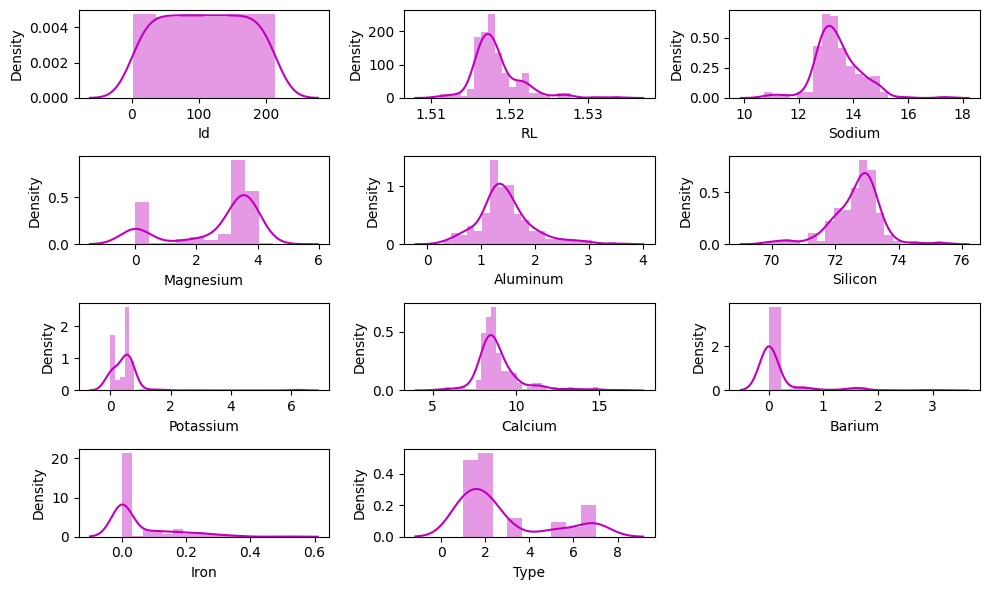

In [ ]:
plt.figure(figsize=(10, 6),facecolor='white')
plotnumber = 1

for i in df:
    if plotnumber <= 12:
        ax = plt.subplot(4, 3, plotnumber)
        sns.distplot(df[i], color='m')  # Use histplot instead of displot for individual axes
        plt.xlabel(i)
        plt.yticks(rotation=0, fontsize=10)
    plotnumber += 1

plt.tight_layout()
plt.show()

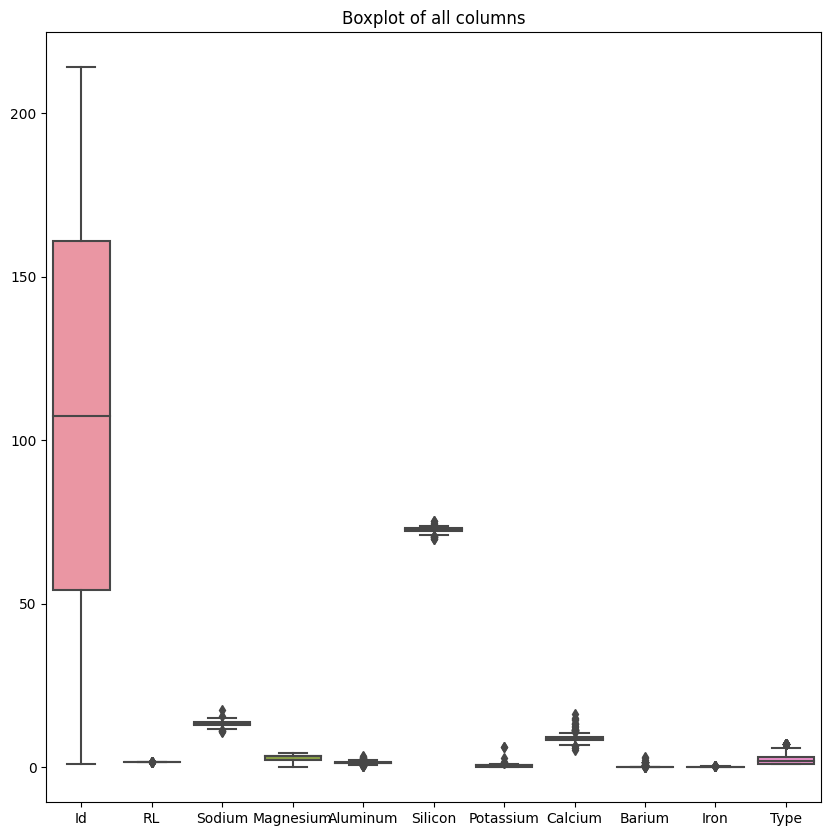

In [ ]:
plt.figure(figsize=(10, 10))
sns.boxplot(data=df)
plt.title('Boxplot of all columns')
plt.show()

In [ ]:
from scipy.stats import iqr

# Assuming df is your DataFrame

# Calculate the first quartile (Q1), third quartile (Q3), and IQR
q1 = df.quantile(0.25)
q3 = df.quantile(0.75)
iqr_value = iqr(df)

# Define lower and upper bounds
lower_bound = q1 - 1.5 * iqr_value
upper_bound = q3 + 1.5 * iqr_value

# Identify outliers
outliers = (df < lower_bound) | (df > upper_bound)

# Replace outliers with NaN
df[outliers] = np.nan

# Print the shape of the DataFrame after removing outliers
print(df.shape)

(214, 11)


<Axes: >

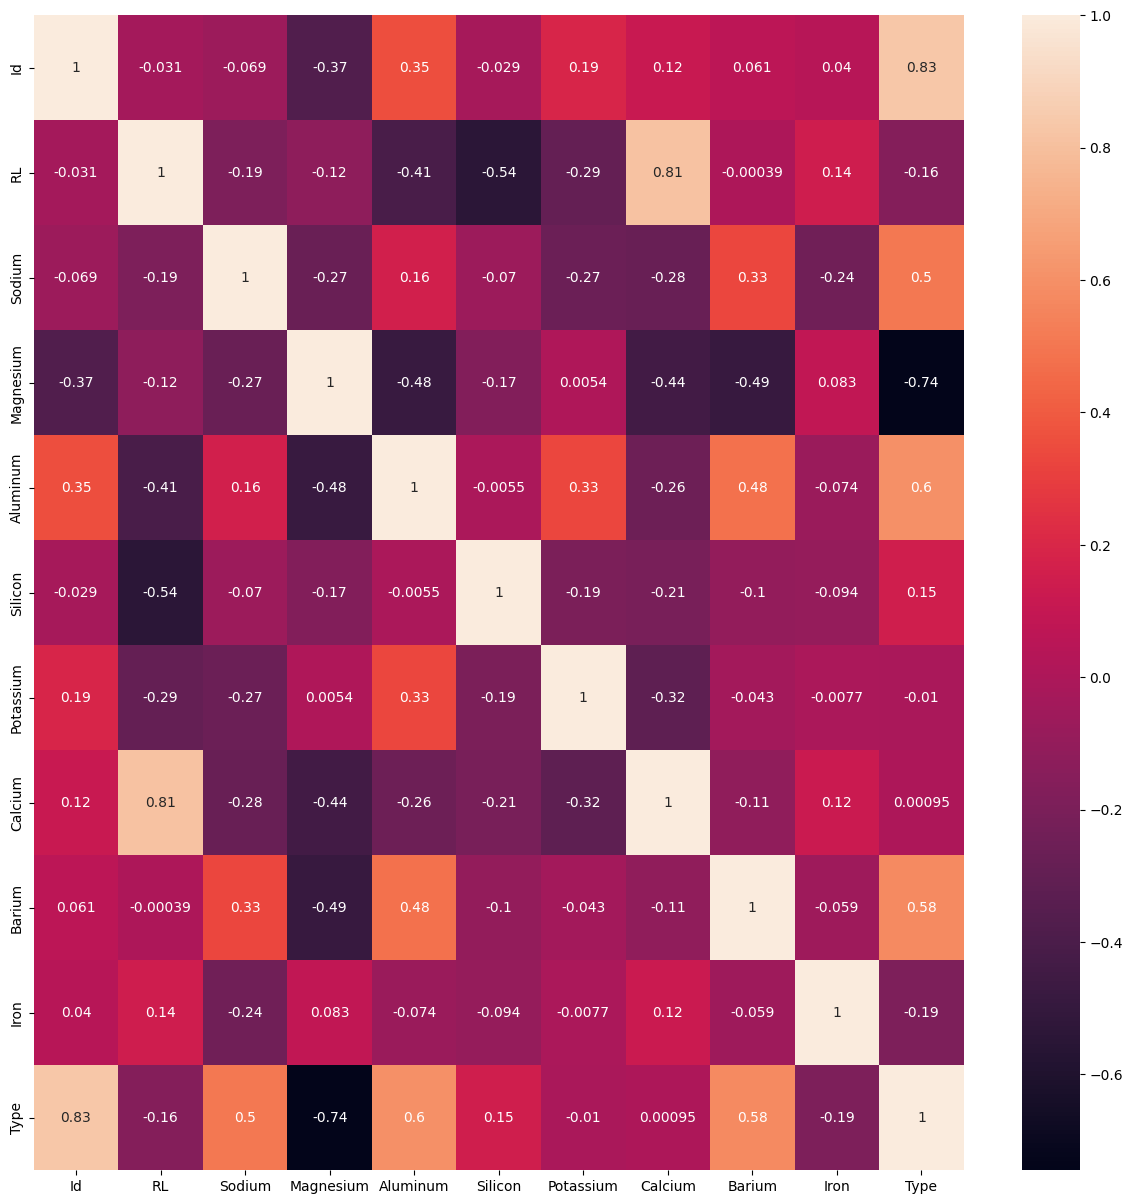

In [ ]:
plt.figure(figsize = (15,15))
sns.heatmap(df.corr(),annot=True)

In [ ]:
df=df.drop(['Id'],axis=1)

In [ ]:
df.columns

Index(['RL', 'Sodium', 'Magnesium', 'Aluminum', 'Silicon', 'Potassium',
       'Calcium', 'Barium', 'Iron', 'Type'],
      dtype='object')

In [ ]:
y=df['Type']

In [ ]:
x=df.drop(['Type'],axis=1)

#Oversampling

In [ ]:
from imblearn.over_sampling import SMOTE
SM=SMOTE()
x,y=SM.fit_resample(x,y)

In [ ]:
y.value_counts()

1    76
2    76
3    76
5    76
6    76
7    76
Name: Type, dtype: int64

In [ ]:
x.shape

(456, 9)

In [ ]:
y.shape

(456,)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif['Features'] = x.columns
vif

VIF Factor   Features
0    8.663450         RL
1  101.592381     Sodium
2  312.540794  Magnesium
3   35.220100   Aluminum
4   79.198981    Silicon
5   74.419416  Potassium
6  258.463089    Calcium
7   34.635973     Barium
8    1.440078       Iron

In [ ]:
x.drop('Magnesium',axis=1,inplace=True)

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif['Features'] = x.columns
vif

VIF Factor   Features
0    8.533115         RL
1    1.800488     Sodium
2    2.511680   Aluminum
3    2.988339    Silicon
4    2.266469  Potassium
5    5.454351    Calcium
6    1.996323     Barium
7    1.118404       Iron

In [ ]:
x.drop('RL',axis=1,inplace=True)

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif['Features'] = x.columns
vif

VIF Factor   Features
0    1.661990     Sodium
1    1.670640   Aluminum
2    1.221069    Silicon
3    2.104984  Potassium
4    1.520737    Calcium
5    1.549991     Barium
6    1.099175       Iron

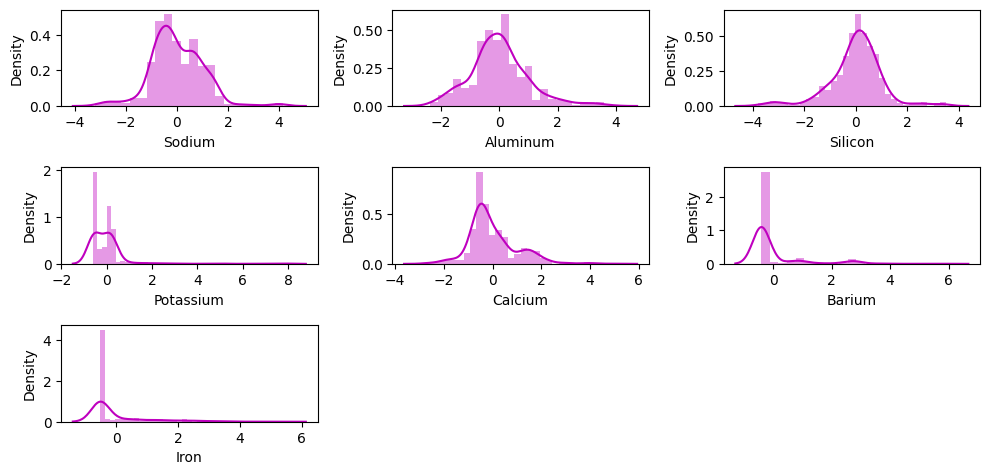

In [ ]:
plt.figure(figsize=(10, 6),facecolor='white')
plotnumber = 1

for i in x:
    if plotnumber <= 12:
        ax = plt.subplot(4, 3, plotnumber)
        sns.distplot(x[i], color='m')  # Use histplot instead of displot for individual axes
        plt.xlabel(i)
        plt.yticks(rotation=0, fontsize=10)
    plotnumber += 1

plt.tight_layout()
plt.show()

In [ ]:
x.skew()

Sodium       0.370353
Aluminum     0.634523
Silicon     -0.489108
Potassium    5.101732
Calcium      1.116343
Barium       2.760505
Iron         2.237140
dtype: float64

In [ ]:
x['Calcium'] = np.log1p(x['Calcium'])
x['Potassium'] = np.log1p(x['Potassium'])
x['Barium'] = np.log1p(x['Barium'])
x['Iron'] = np.log1p(x['Iron'])

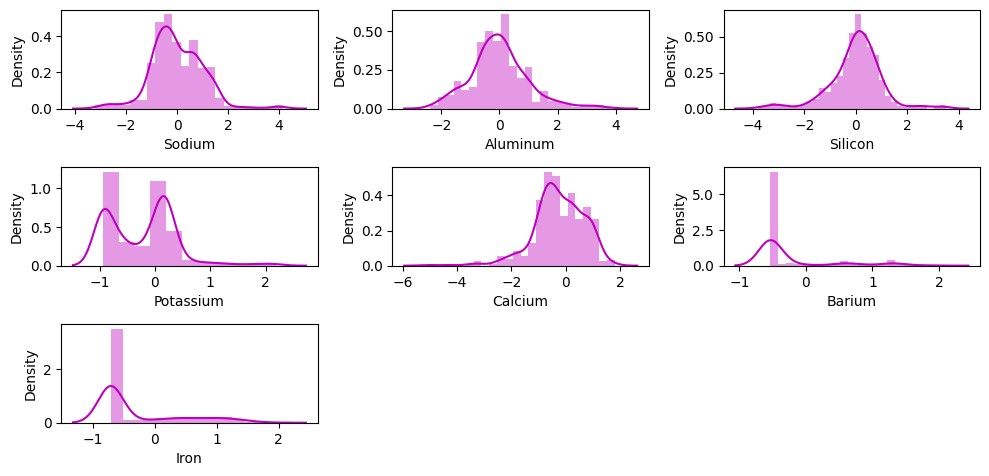

In [ ]:
plt.figure(figsize=(10, 6),facecolor='white')
plotnumber = 1

for i in x:
    if plotnumber <= 12:
        ax = plt.subplot(4, 3, plotnumber)
        sns.distplot(x[i], color='m')  # Use histplot instead of displot for individual axes
        plt.xlabel(i)
        plt.yticks(rotation=0, fontsize=10)
    plotnumber += 1

plt.tight_layout()
plt.show()

In [ ]:
x.skew()

Sodium       0.370353
Aluminum     0.634523
Silicon     -0.489108
Potassium    0.770806
Calcium     -0.925029
Barium       1.963378
Iron         1.383601
dtype: float64

In [ ]:
x.isna().sum()

Sodium        0
Aluminum      0
Silicon       0
Potassium     0
Calcium      29
Barium        0
Iron          0
dtype: int64

In [ ]:
x['Calcium'].fillna(x['Calcium'].median(), inplace=True)
x.isna().sum()

Sodium       0
Aluminum     0
Silicon      0
Potassium    0
Calcium      0
Barium       0
Iron         0
dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

maxAcc=0
maxRs=0

for i in range(1,200):
  x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3,random_state=i)
  RFC=RandomForestClassifier()
  RFC.fit(x_train,y_train)
  pred=RFC.predict(x_test)
  acc=accuracy_score(y_test,pred)
  if acc>maxAcc:
    maxAcc=acc
    maxRs=i
print('Best Accuracy', maxAcc, 'random_state is', maxRs)

Best Accuracy 0.9124087591240876 random_state is 12


#Create Train Test Split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3,random_state=maxRs)

#Classification Algorithms

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier,BaggingClassifier
from sklearn.metrics import accuracy_score,roc_curve,classification_report,confusion_matrix
from sklearn.model_selection import cross_val_score

#RandomForest

In [ ]:
RFC=RandomForestClassifier()
RFC.fit(x_train,y_train)
pred_RFC=RFC.predict(x_test)
print(accuracy_score(y_test,pred_RFC))
print(confusion_matrix(y_test,pred_RFC))
print(classification_report(y_test,pred_RFC))

0.8978102189781022
[[21  1  2  0  0  0]
 [ 3 14  0  0  0  1]
 [ 4  2 19  0  0  0]
 [ 0  0  0 21  0  0]
 [ 0  0  0  0 26  0]
 [ 0  1  0  0  0 22]]
              precision    recall  f1-score   support

           1       0.75      0.88      0.81        24
           2       0.78      0.78      0.78        18
           3       0.90      0.76      0.83        25
           5       1.00      1.00      1.00        21
           6       1.00      1.00      1.00        26
           7       0.96      0.96      0.96        23

    accuracy                           0.90       137
   macro avg       0.90      0.89      0.89       137
weighted avg       0.90      0.90      0.90       137



#Support Vector Machine Classifier

In [ ]:
svc=SVC()
svc.fit(x_train,y_train)
pred_svc=svc.predict(x_test)
print(accuracy_score(y_test,pred_svc))
print(confusion_matrix(y_test,pred_svc))
print(classification_report(y_test,pred_svc))

0.7956204379562044
[[11  1 12  0  0  0]
 [ 4 10  3  1  0  0]
 [ 5  2 18  0  0  0]
 [ 0  0  0 21  0  0]
 [ 0  0  0  0 26  0]
 [ 0  0  0  0  0 23]]
              precision    recall  f1-score   support

           1       0.55      0.46      0.50        24
           2       0.77      0.56      0.65        18
           3       0.55      0.72      0.62        25
           5       0.95      1.00      0.98        21
           6       1.00      1.00      1.00        26
           7       1.00      1.00      1.00        23

    accuracy                           0.80       137
   macro avg       0.80      0.79      0.79       137
weighted avg       0.80      0.80      0.79       137



#Gradient Boosting Classifier

In [ ]:
GB=GradientBoostingClassifier()
GB.fit(x_train,y_train)
pred_GB=GB.predict(x_test)
print(accuracy_score(y_test,pred_GB))
print(confusion_matrix(y_test,pred_GB))
print(classification_report(y_test,pred_GB))

0.8175182481751825
[[17  5  0  2  0  0]
 [ 4 12  2  0  0  0]
 [ 7  2 16  0  0  0]
 [ 0  1  0 20  0  0]
 [ 0  0  0  0 26  0]
 [ 0  1  0  1  0 21]]
              precision    recall  f1-score   support

           1       0.61      0.71      0.65        24
           2       0.57      0.67      0.62        18
           3       0.89      0.64      0.74        25
           5       0.87      0.95      0.91        21
           6       1.00      1.00      1.00        26
           7       1.00      0.91      0.95        23

    accuracy                           0.82       137
   macro avg       0.82      0.81      0.81       137
weighted avg       0.83      0.82      0.82       137



#AdaBoost

In [ ]:
Ada=AdaBoostClassifier()
Ada.fit(x_train,y_train)
pred_Ada=Ada.predict(x_test)
print(accuracy_score(y_test,pred_Ada))
print(confusion_matrix(y_test,pred_Ada))
print(classification_report(y_test,pred_Ada))

0.35766423357664234
[[ 2  3 19  0  0  0]
 [ 1  0 16  0  1  0]
 [ 0  0 25  0  0  0]
 [ 0 16  1  4  0  0]
 [ 0  0 15  0 11  0]
 [ 8  0  1  7  0  7]]
              precision    recall  f1-score   support

           1       0.18      0.08      0.11        24
           2       0.00      0.00      0.00        18
           3       0.32      1.00      0.49        25
           5       0.36      0.19      0.25        21
           6       0.92      0.42      0.58        26
           7       1.00      0.30      0.47        23

    accuracy                           0.36       137
   macro avg       0.46      0.33      0.32       137
weighted avg       0.49      0.36      0.34       137



#Bagging Classifier

In [ ]:
bc=BaggingClassifier()
bc.fit(x_train,y_train)
pred_bc=bc.predict(x_test)
print(accuracy_score(y_test,pred_bc))
print(confusion_matrix(y_test,pred_bc))
print(classification_report(y_test,pred_bc))

0.8321167883211679
[[17  3  4  0  0  0]
 [ 4 12  2  0  0  0]
 [ 5  3 17  0  0  0]
 [ 0  0  0 21  0  0]
 [ 0  0  0  0 26  0]
 [ 0  0  0  2  0 21]]
              precision    recall  f1-score   support

           1       0.65      0.71      0.68        24
           2       0.67      0.67      0.67        18
           3       0.74      0.68      0.71        25
           5       0.91      1.00      0.95        21
           6       1.00      1.00      1.00        26
           7       1.00      0.91      0.95        23

    accuracy                           0.83       137
   macro avg       0.83      0.83      0.83       137
weighted avg       0.83      0.83      0.83       137



#Extra Tree Classifier

In [ ]:
from sklearn.tree import ExtraTreeClassifier
et=ExtraTreeClassifier()
et.fit(x_train,y_train)
pred_et=et.predict(x_test)
print(accuracy_score(y_test,pred_et))
print(confusion_matrix(y_test,pred_et))
print(classification_report(y_test,pred_et))

0.708029197080292
[[12  1  4  5  0  2]
 [ 8  6  2  2  0  0]
 [ 4  3 15  1  0  2]
 [ 0  0  0 21  0  0]
 [ 1  0  0  0 25  0]
 [ 0  4  1  0  0 18]]
              precision    recall  f1-score   support

           1       0.48      0.50      0.49        24
           2       0.43      0.33      0.38        18
           3       0.68      0.60      0.64        25
           5       0.72      1.00      0.84        21
           6       1.00      0.96      0.98        26
           7       0.82      0.78      0.80        23

    accuracy                           0.71       137
   macro avg       0.69      0.70      0.69       137
weighted avg       0.70      0.71      0.70       137



#KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Create and fit the model
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)

# Make predictions
pred_knn = knn.predict(x_test)

# Print evaluation metrics
print("\nK-Nearest Neighbors (KNN):")
print(f"Accuracy: {accuracy_score(y_test, pred_knn)}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, pred_knn)}")
print(f"Classification Report:\n{classification_report(y_test, pred_knn)}")


K-Nearest Neighbors (KNN):
Accuracy: 0.8467153284671532
Confusion Matrix:
[[18  0  6  0  0  0]
 [ 3 10  3  2  0  0]
 [ 7  0 18  0  0  0]
 [ 0  0  0 21  0  0]
 [ 0  0  0  0 26  0]
 [ 0  0  0  0  0 23]]
Classification Report:
              precision    recall  f1-score   support

           1       0.64      0.75      0.69        24
           2       1.00      0.56      0.71        18
           3       0.67      0.72      0.69        25
           5       0.91      1.00      0.95        21
           6       1.00      1.00      1.00        26
           7       1.00      1.00      1.00        23

    accuracy                           0.85       137
   macro avg       0.87      0.84      0.84       137
weighted avg       0.86      0.85      0.85       137



#Cross Validation

In [ ]:
#check cv score for randomforest

score=cross_val_score(RFC,x,y)
print(score)
print(score.mean())
print('Difference between accuracy score and cross valication score is', accuracy_score(y_test,pred_RFC) - score.mean())

[0.82608696 0.83516484 0.78021978 0.79120879 0.82417582]
0.8113712374581941
Difference between accuracy score and cross valication score is 0.08643898151990814


In [ ]:
#check cv score for svc

score=cross_val_score(svc,x,y)
print(score)
print(score.mean())
print('Difference between accuracy score and cross valication score is', accuracy_score(y_test,pred_svc) - score.mean())

[0.77173913 0.75824176 0.76923077 0.78021978 0.72527473]
0.7609412326803631
Difference between accuracy score and cross valication score is 0.03467920527584134


In [ ]:
#check cv score for Gradient Boosting

score=cross_val_score(GB,x,y)
print(score)
print(score.mean())
print('Difference between accuracy score and cross valication score is', accuracy_score(y_test,pred_GB) - score.mean())

[0.73913043 0.75824176 0.82417582 0.83516484 0.78021978]
0.7873865265169613
Difference between accuracy score and cross valication score is 0.0301317216582212


In [ ]:
#check cv score for Adaboost

score=cross_val_score(Ada,x,y)
print(score)
print(score.mean())
print('Difference between accuracy score and cross valication score is', accuracy_score(y_test,pred_Ada) - score.mean())

[0.27173913 0.32967033 0.40659341 0.35164835 0.37362637]
0.34665551839464886
Difference between accuracy score and cross valication score is 0.011008715181993478


In [ ]:
#check cv score for Bagging Classifier

score=cross_val_score(bc,x,y)
print(score)
print(score.mean())
print('Difference between accuracy score and cross valication score is', accuracy_score(y_test,pred_bc) - score.mean())

[0.82608696 0.81318681 0.8021978  0.82417582 0.76923077]
0.8069756330625895
Difference between accuracy score and cross valication score is 0.025141155258578407


In [ ]:
#check cv score for Extra tree Classifier

score=cross_val_score(et,x,y)
print(score)
print(score.mean())
print('Difference between accuracy score and cross valication score is', accuracy_score(y_test,pred_et) - score.mean())

[0.75       0.74725275 0.74725275 0.74725275 0.74725275]
0.7478021978021978
Difference between accuracy score and cross valication score is -0.039773000721905816


In [ ]:
scores = cross_val_score(knn, x, y, cv=5)

# Print cross-validation scores
print(scores)
print(scores.mean())

print("Difference between accuracy score and cross-validation score is", accuracy_score(y_test, pred_knn) - scores.mean())

[0.88043478 0.78021978 0.75824176 0.76923077 0.82417582]
0.8024605828953655
Difference between accuracy score and cross-validation score is 0.04425474557178777


Conclusion: Bagging Classifier performs well

#Hyper Parameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV
# Create a dictionary of hyperparameters to search over
hyperparameters = {
    'n_estimators': [10, 50, 100],
    'max_samples': [0.5, 0.7, 1.0],
    'max_features': [0.5, 0.7, 1.0],
}

In [ ]:
GVC = GridSearchCV(bc, hyperparameters, cv=5, scoring='accuracy')


In [ ]:
GVC.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=BaggingClassifier(),
             param_grid={'max_features': [0.5, 0.7, 1.0],
                         'max_samples': [0.5, 0.7, 1.0],
                         'n_estimators': [10, 50, 100]},
             scoring='accuracy')

In [ ]:
GVC.best_params_

{'max_features': 0.7, 'max_samples': 0.7, 'n_estimators': 100}

In [ ]:
final_model=BaggingClassifier(max_features= .7, max_samples= 0.7, n_estimators=100)
final_model.fit(x_train,y_train)
pred=final_model.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)

89.78102189781022
